<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Julian_Gongora_A01793036/blob/main/A01793036_Actividad_Semanal_7_Regresiones_y_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#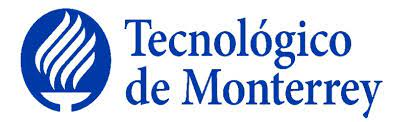

**Maestria: Inteligencia artificial aplicada (MNA)** **- Materia:Ciencia Y Analítica de Datos**

**Actividad Semanal - 7 Regresiones y K means**

Estudiante A01793036 - Julian Gongora

Profesor Titular: PhD. María de la Paz Rico

Profesor Tutor: Victoria Guerrero Orozco


#**Ejercicio 1. Costo en la industria de manufactura**

In [33]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [95]:
#1.0. Carga de base de datos
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
X = df[['Number of Units']]
y = df['Manufacturing Cost']
df.sample(5)

,Number of Units,Manufacturing Cost
51,2.305669,75.521970
847,5.748833,33.912194
333,3.928317,43.626559
46,2.210295,56.542852
712,5.201227,28.286841


In [35]:
len(X)

1000

In [36]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

In [37]:
#1.1. Se divide los datos del costo de manufactura. Utiliza la función train_test_split.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

**Nota:** se va a utilizar 70% de la base para entrenal el modelo y 30% para el testing. Como se indica a continuación:

In [38]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
print(f'Numero total de registros en la bdd: {len(X)}')
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
Numero total de registros en el training set: 700
Tamaño de X_train: (700, 1)
Mumero total de registros en el test dataset: 300
Tamaño del X_test: (300, 1)


In [96]:
#1.2 Realiza la REGRESIÓN LINEAL: modelo generado (ecuación), su visualización, sus errores y r cuadrada
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline

In [46]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

In [47]:
 linear_reg.coef_, linear_reg.intercept_ 

(array([-5.98980103]), 66.89748040122576)

**Resultado - Modelo generado:** De acuerdo a la regreción tenemos la ecuación:

 **$y= -5.989X + 66.897$**

 **Resultado - Vizualización:**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


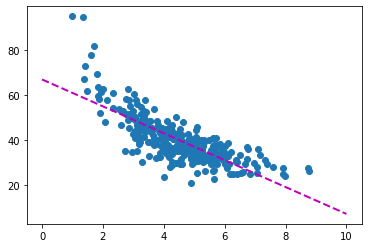

In [67]:
plt.scatter(X_test, y_test)
X_fit_P = np.linspace(0, 10, 100).reshape(100, 1)
y_fit = linear_reg.predict(X_fit_P)
plt.plot(X_fit_P, y_fit,"m-", linestyle='dashed', linewidth=2, label="Predictions")

 **Resultado - sus errores y r cuadrada:**

In [62]:
y_pred=linear_reg.predict(X_test)
MAE_RL=metrics.mean_absolute_error(y_test, y_pred)
RMSE_RL=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_RL=r2_score(y_test, y_pred)
print('Regresión Lineal Error:')
print('Error medio Absoluto (MAE):', MAE_RL)
print('Root Mean Squared Error:', RMSE_RL)
print('r2_score',R2_RL)

Regresión Lineal Error:
Error medio Absoluto (MAE): 4.848701594938563
Root Mean Squared Error: 6.73635897582296
r2_score 0.6056489925064351


In [63]:
#1.3. Realiza la  REGRESIÓN POLINOMIAL completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

from sklearn.preprocessing import PolynomialFeatures


In [64]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [65]:
lin_reg_poly = LinearRegression(fit_intercept=True)
lin_reg_poly.fit(X_poly, y_train)
lin_reg_poly.coef_, lin_reg_poly.intercept_

(array([-32.51628687,   4.73223868,  -0.24591695]), 110.47763909868965)

**Resultado - Modelo generado:** De acuerdo a la regreción tenemos la ecuación:

 **$y= -32.51X + 4.73X^2 -0.2459X^3 + 110.47$**

 **Resultado - Vizualización:**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


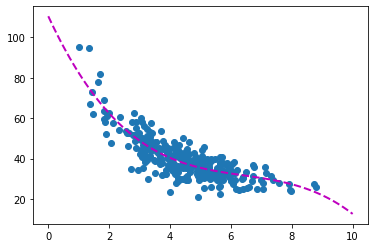

In [76]:
plt.scatter(X_test, y_test)
X_fit_P = np.linspace(0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_fit_P)
y_fit = lin_reg_poly.predict(X_new_poly)
plt.plot(X_fit_P, y_fit, "m-", linestyle='dashed', linewidth=2, label="Predictions")

**Resultado - Modelo generado:** sus errores y r cuadrada.

In [74]:
X_test_poly= poly_features.transform(X_test)
y_pred_poly=lin_reg_poly.predict(X_test_poly)

In [75]:
MAE_RP=metrics.mean_absolute_error(y_test, y_pred_poly)
RMSE_RP=np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly))
R2_RP=r2_score(y_test, y_pred_poly)
print('Regresión Polinomial Errores:')
print('Error medio Absoluto (MAE):', MAE_RP)
print('Root Mean Squared Error:', RMSE_RP)
print('r2_score',R2_RP)

Regresión Polinomial Errores:
Error medio Absoluto (MAE): 4.283500318122029
Root Mean Squared Error: 5.547029923845796
r2_score 0.7326048489876285


In [77]:
#1.4. REGRESIÓN con Ridge y Lasso: Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

#1.4.1 Regresión con RIDGE
from sklearn.pipeline import Pipeline
ridgeP1=Pipeline([('poly',PolynomialFeatures(degree=6, include_bias=False)),('rig',Ridge(alpha=0.000001))])
ridgeP1.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=6, include_bias=False)),
                ('rig', Ridge(alpha=1e-06))])

In [78]:
ridgeP1.named_steps['rig'].coef_, ridgeP1.named_steps['rig'].intercept_

(array([-1.79316431e+02,  8.38033109e+01, -2.13994553e+01,  3.01015600e+00,
        -2.18434062e-01,  6.36246449e-03]), 213.98772023792208)

**Resultado - Modelo generado:** De acuerdo a la regreción tenemos la ecuación:

 **$y= (-1.7931e+02)X  +(8.3803e+01)X^2 -(2.1399e+01)X^3  +(3.0101e+00)X^4 -(2.1843e-01)X^5 +(6.3624e-03)X^6 +213.9877)$**


 **Resultado - Vizualización:**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


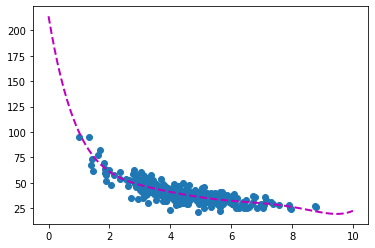

In [82]:
plt.scatter(X_test, y_test)
X_fit_R = np.linspace(0, 10, 100).reshape(100, 1)
y_fit = ridgeP1.predict(X_fit_R)
plt.plot(X_fit_R, y_fit, "m-", linestyle='dashed', linewidth=2, label="Predictions")

**Resultado - Modelo generado:** sus errores y r cuadrada.

In [83]:
y_pred_rid=ridgeP1.predict(X_test)

In [84]:
MAE_Ridge=metrics.mean_absolute_error(y_test, y_pred_rid)
RMSE_Ridge=np.sqrt(metrics.mean_squared_error(y_test, y_pred_rid))
R2_Ridge=r2_score(y_test, y_pred_rid)
print('Regresión Ridge:')
print('Error medio Absoluto (MAE):', MAE_Ridge)
print('Root Mean Squared Error:', RMSE_Ridge)
print('r2_score',R2_Ridge)

Regresión Ridge:
Error medio Absoluto (MAE): 4.265217485508633
Root Mean Squared Error: 5.481573694315352
r2_score 0.738878264059352


In [85]:
#1.4.1 Regresión con LASSO
LassoP1=Pipeline([('poly',PolynomialFeatures(degree=3, include_bias=False)),('la',Lasso(alpha=0.2))])
LassoP1.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('la', Lasso(alpha=0.2))])

In [86]:
LassoP1.named_steps['la'].coef_, LassoP1.named_steps['la'].intercept_

(array([-9.92325935, -0.        ,  0.05855715]), 77.84773959354808)

**Resultado - Modelo generado:** De acuerdo a la regreción tenemos la ecuación:

 **$y= -9.9232X  +0.05855X^3 +77.8477$**


 **Resultado - Vizualización:**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


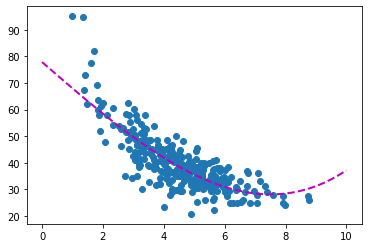

In [107]:
plt.scatter(X_test, y_test)
X_fit = np.linspace(0, 10, 100).reshape(100, 1)
y_fit = LassoP1.predict(X_fit)
plt.plot(X_fit, y_fit, "m-", linestyle='dashed', linewidth=2, label="Predictions")

**Resultado - Modelo generado:** sus errores y r cuadrada.

In [91]:
y_pred_lasso=LassoP1.predict(X_test)

In [90]:
MAE_Lasso=metrics.mean_absolute_error(y_test, y_pred_lasso)
RMSE_Lasso=np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
R2_Lasso=r2_score(y_test, y_pred_lasso)
print('Regresión Lasso:')
print('Error medio Absoluto (MAE):', MAE_Lasso)
print('Root Mean Squared Error:', RMSE_Lasso)
print('r2_score',R2_Lasso)

Regresión Lasso:
Error medio Absoluto (MAE): 4.348983825087731
Root Mean Squared Error: 5.9994621587674875
r2_score 0.6872069125880406


In [92]:
#1.5. GRÁFICAS: MAE (de los cuatro métodos)
MAE_values=[MAE_RL,MAE_RP,MAE_Ridge,MAE_Lasso]
MAE_labels=['MAE_RL','MAE_RP','MAE_Ridge','MAE_Lasso']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


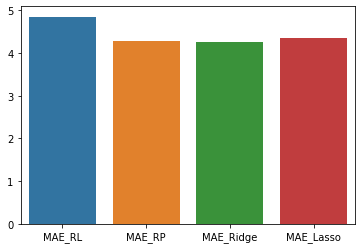

In [93]:
sns.barplot(MAE_labels, MAE_values)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


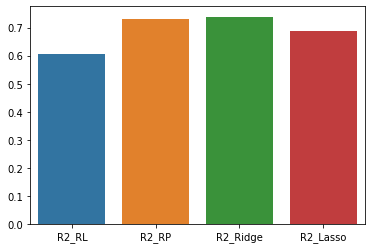

In [94]:
#1.5. GRÁFICAS: R^2 (de los 4 métodos))
R2_values=[R2_RL,R2_RP,R2_Ridge,R2_Lasso]
R2_labels=['R2_RL','R2_RP','R2_Ridge','R2_Lasso']
sns.barplot(R2_labels, R2_values)

**1.6 RESULTADOS Y ANÁLISIS**

1. ¿Que método conviene más a la empresa? y ¿por que?  

 RTA:El método que presenta el mayo R2 es la REGRESIÓN RIDGE con un R2 de 0.7388. Este R2 es un buen indicador del exito de predicción del modelo, así que se elige el que más se acerca a 1. 
 
 Ecuación: 
  y=(−1.7931e+02)X+(8.3803e+01)X2−(2.1399e+01)X3+(3.0101e+00)X4−(2.1843e−01)X5+(6.3624e−03)X6+213.9877)
2. ¿Que porcentajes de entrenamiento y evaluación usaste?

 RTA: Bueno, utilice 70% para entrenamiento y 30% para testing. Sugerido por la profesora en clase.
3. ¿Que error tienes?, ¿es bueno?, ¿cómo lo sabes? 

 RTA: Para el modelo seleccionado Regresión Ridge  con polinomio de grado 6 con un error del 26% (aprox), se determino por el R2. 

#**Ejercicio 2. Regresión múltiple.**

In [118]:
#2.0. Carga de base de datos
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4914,7950302890,20141230T000000,455000.0,4,2.00,2380,4500,1.5,0,0,...,6,1470,910,1926,2014,98118,47.5652,-122.281,1300,4500
12255,7625702505,20150306T000000,605000.0,4,2.75,1670,6000,1.0,0,0,...,7,840,830,1917,0,98136,47.5496,-122.385,1100,6000
9847,4400200060,20141021T000000,650000.0,5,2.00,1910,4667,1.0,0,0,...,7,1010,900,1908,0,98112,47.6236,-122.306,1230,2545
20366,7133300380,20150209T000000,635000.0,4,2.50,2500,4000,2.0,0,0,...,8,2500,0,2014,0,98144,47.5902,-122.311,1480,4300
1361,1925069082,20150511T000000,2200000.0,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [111]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [112]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

In [113]:
columns = df.columns.drop('price')

features = columns
label = ['price']

Z = df[features]
w = df[label]

In [114]:
len(Z)

21613

In [117]:
w.describe()

,price
count,2.161300e+04
mean,5.400881e+05
std,3.671272e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


In [120]:
#2.1. Se divide los datos del costo de manufactura. Utiliza la función train_test_split.
from sklearn.model_selection import train_test_split
Z_train, Z_test, w_train, w_test = train_test_split(Z, w, test_size = 0.3, random_state = 101)

print(f'Numero total de registros en la bdd: {len(Z)}')
print(f'Numero total de registros en el training set: {len(Z_train)}')
print(f'Tamaño de Z_train: {Z_train.shape}')
print(f'Mumero total de registros en el test dataset: {len(Z_test)}')
print(f'Tamaño del Z_test: {Z_test.shape}')

Numero total de registros en la bdd: 21613
Numero total de registros en el training set: 15129
Tamaño de Z_train: (15129, 15)
Mumero total de registros en el test dataset: 6484
Tamaño del Z_test: (6484, 15)


In [122]:
#2.3. REGRESIÓN MÚLTIPLE LINEAL: Modelo generado (ecuación), su visualización, sus errores y r cuadrada.
M_linear_reg = LinearRegression(fit_intercept=True)
M_linear_reg.fit(Z_train, w_train)

LinearRegression()

In [123]:
M_linear_reg.coef_, M_linear_reg.intercept_

(array([[-4.06367294e+04,  3.91411255e+04,  1.10156714e+02,
          3.17271971e-02,  3.09253823e+04,  5.45045027e+05,
          4.27884230e+04,  2.14984534e+04,  1.20671456e+05,
          5.23796503e+01,  5.77770637e+01, -3.54135246e+03,
          1.08717422e+01,  2.42490340e+01, -5.50657549e-01]]),
 array([6134262.55907876]))

**Resultado - Modelo generado:** De acuerdo a la regreción tenemos la ecuación:

 **$w=(-4.0636e+04)Z +(3.9141e+04)Z^2 +(1.1015e+02)Z^3 +(3.1727e-02)Z^4 +(3.0925e+04)Z^5 +(5.4504e+05)Z^6 +(4.2788e+04)Z^7 +(2.1498e+04)Z^8 +(1.2067e+05)Z^9 +(5.2379e+01)Z^10 +(5.777e+01)Z^11 -(3.5413e+03)Z^12 +(1.0871e+01)Z^13 +(2.4249e+01)Z^14 -(5.50657549e-01)Z^15 +6134262.559$**

 **Resultado - Vizualización:**

In [220]:
lin_reg_M_poly.intercept_

array([83266735.3684347])

In [221]:
w_test.reset_index(drop=True,inplace = True) 

In [222]:
w_M_pred=M_linear_reg.predict(Z_test)

In [223]:
Z_test_M_poly= M_poly_features.transform(Z_test)
w_pred_M_poly=lin_reg_M_poly.predict(Z_test_M_poly)

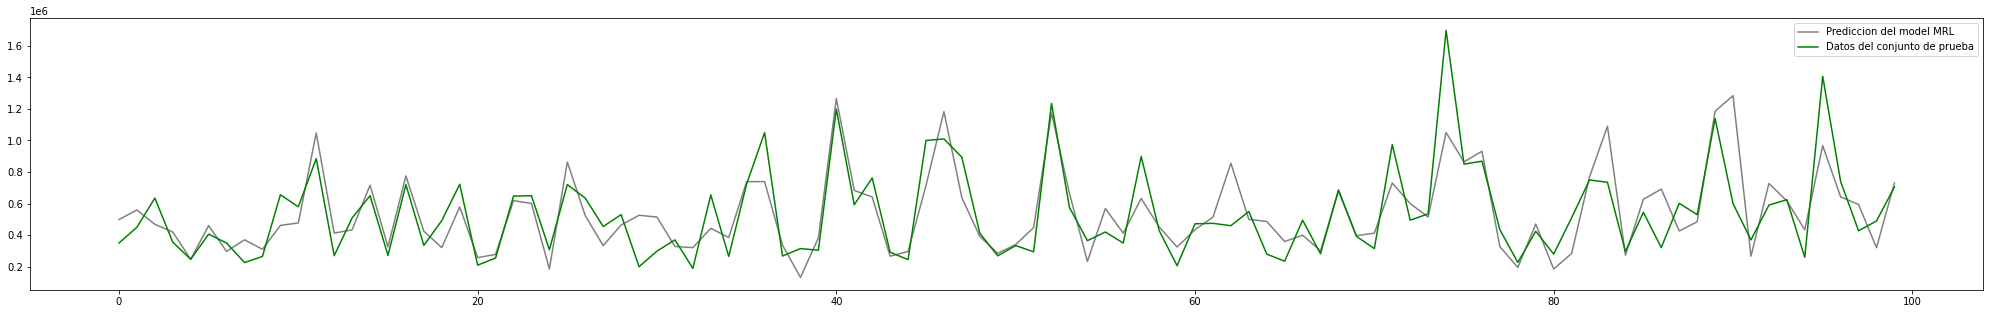

In [224]:
from matplotlib import markers
plt.figure(figsize=(35,5))
plt.plot(w_M_pred[0:100],'grey',label='predicted') # Solo usaremos 120 para fines de visualizacion
plt.plot(w_test[0:100],'green',label='Tested') # Solo usaremos 120 para fines de visualizacion
plt.legend(['Prediccion del model MRL','Datos del conjunto de prueba'])

**Resultado - sus errores y r cuadrada:**

In [302]:
MAE_MRL=metrics.mean_absolute_error(w_test, w_M_pred)
RMSE_MRL=np.sqrt(metrics.mean_squared_error(w_test, w_M_pred))
R2_MRL=r2_score(w_test, w_M_pred)
print('Regresión Lineal Erores:')
print('Error medio Absoluto (MAE):', MAE_MRL)
print('Root Mean Squared Error:', RMSE_MRL)
print('r2_score',R2_MRL)

Regresión Lineal Erores:
Error medio Absoluto (MAE): 139544.69224939568
Root Mean Squared Error: 217394.2186176636
r2_score 0.6630883667184033


In [149]:
#2.4. REGRESIÓN MÚLTIPLE POLINOMIAL: Modelo generado (ecuación), su visualización, sus errores y r cuadrada.
M_poly_features = PolynomialFeatures(degree=2, include_bias=False)
Z_M_poly = M_poly_features.fit_transform(Z_train)

In [152]:
lin_reg_M_poly = LinearRegression(fit_intercept=True)
lin_reg_M_poly.fit(Z_M_poly, w_train)
lin_reg_M_poly.coef_.shape

(1, 135)

In [153]:
lin_reg_M_poly.intercept_

array([83266735.3684347])

**Resultado - Modelo generado:** De acuerdo a la regreción tenemos la ecuación:
Este es un polinomio de grado 2 con 135 coeficientes. 

 **Resultado - Vizualización:**

In [155]:
Z_test_M_poly= M_poly_features.transform(Z_test)
w_pred_M_poly=lin_reg_M_poly.predict(Z_test_M_poly)

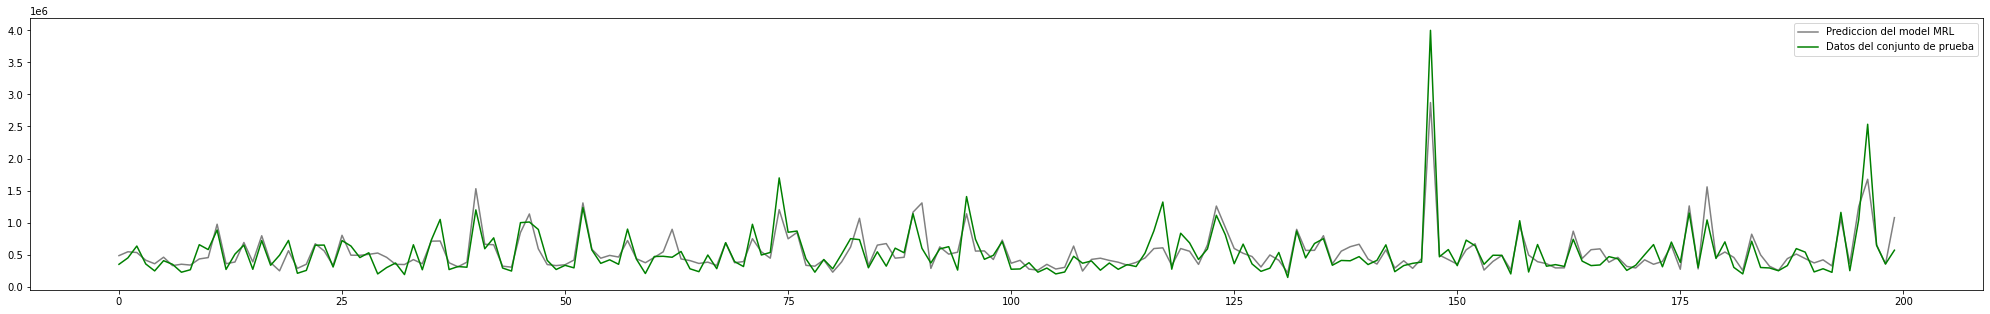

In [158]:
from matplotlib import markers
plt.figure(figsize=(35,5))
plt.plot(w_pred_M_poly[0:200],'gray',label='predicted') # Solo usaremos 200 para fines de visualizacion
plt.plot(w_test[0:200],'green',label='Tested') # Solo usaremos 200 para fines de visualizacion
plt.legend(['Prediccion del model MRL','Datos del conjunto de prueba'])

**Resultado - sus errores y r cuadrada:**

In [160]:
MAE_MRP=metrics.mean_absolute_error(w_test, w_pred_M_poly)
RMSE_MRP=np.sqrt(metrics.mean_squared_error(w_test, w_pred_M_poly))
R2_MRP=r2_score(w_test, w_pred_M_poly)
print('Regresión Polinomial Errores:')
print('Error medio Absoluto (MAE):', MAE_MRP)
print('Root Mean Squared Error:', RMSE_MRP)
print('r2_score',R2_MRP)

Regresión Polinomial Errores:
Error medio Absoluto (MAE): 125400.5665297848
Root Mean Squared Error: 186886.8532838251
r2_score 0.7510125084999976


In [165]:
#2.5. REGRESIÓN con Ridge y Lasso: Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

#2.5.1 Regresión con RIDGE

ridge1M=Pipeline([('poly',PolynomialFeatures(degree=2, include_bias=False)),('rg',Ridge(alpha=0.0001))])
ridge1M.fit(Z_train, w_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('rg', Ridge(alpha=0.0001))])

In [166]:
ridge1M.named_steps['rg'].coef_.shape

(1, 135)

In [167]:
ridge1M.named_steps['rg'].coef_, ridge1M.named_steps['rg'].intercept_

(array([[ 1.06712320e+06, -1.27549353e+06, -5.88263872e+05,
         -2.67927309e+01, -2.15815756e+06, -1.98493781e+06,
         -2.28150633e+05,  3.98634462e+05,  1.05850788e+06,
          5.87457157e+05,  5.87163128e+05, -8.88380607e+04,
         -3.23556531e+03,  4.35895116e+03, -3.50744421e+01,
          1.06825079e+03,  7.34789464e+03,  3.87427590e+05,
         -1.96553469e-02,  8.61523443e+03, -3.01423727e+04,
         -5.54368364e+03, -4.76757826e+03, -5.19096445e+03,
         -3.87440468e+05, -3.87454945e+05, -5.34781108e+02,
         -1.79423239e+01,  1.62802531e+01,  1.31695821e-01,
         -7.64861709e+03, -6.29734071e+05, -5.35184269e-02,
         -2.67094328e+04,  6.71378119e+04,  2.47508901e+03,
         -3.57815881e+02,  1.77262284e+04,  6.29760443e+05,
          6.29741752e+05,  6.12594326e+02, -1.98450561e+01,
         -1.70307819e+01, -1.41772286e-01,  9.34974717e+05,
         -2.30059382e+05, -7.12435038e+05,  6.50424512e+05,
         -6.51828757e+05, -1.34377829e+0

**Resultado - Modelo generado:** De acuerdo a la regreción tenemos la ecuación: Al igual que en el anterior, arrojo un polinomio de grado 2 y 135 coeficientes 

 **Resultado - Vizualización:**

In [169]:
w_pred_M_rid=ridge1M.predict(Z_test)

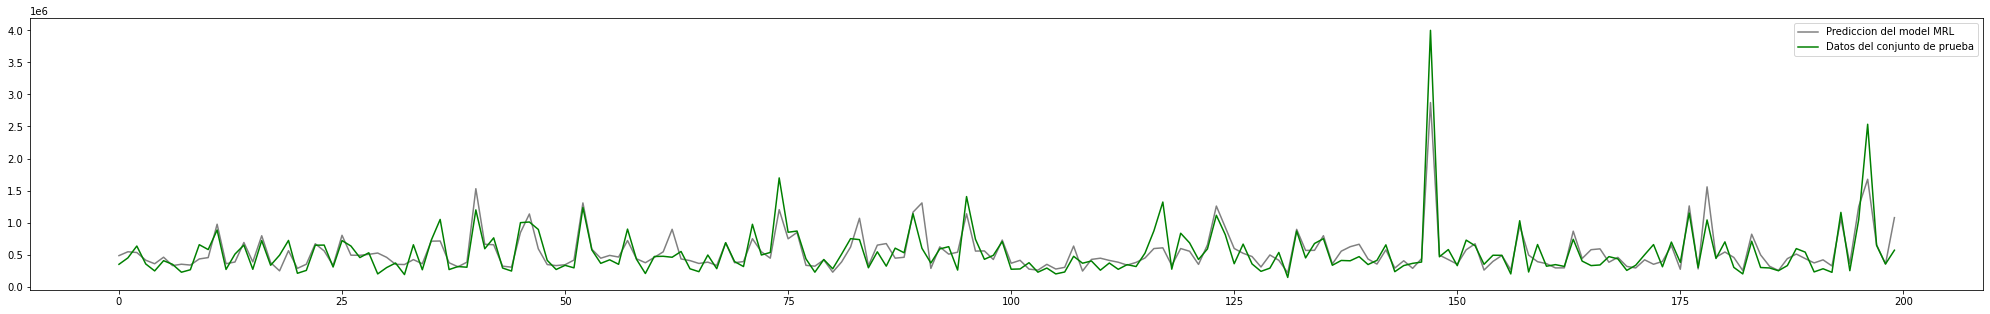

In [173]:
from matplotlib import markers
plt.figure(figsize=(35,5))
plt.plot(w_pred_M_rid[0:200],'gray',label='predicted') # Solo usaremos 120 para fines de visualizacion
plt.plot(w_test[0:200],'green',label='Tested') # Solo usaremos 120 para fines de visualizacion
plt.legend(['Prediccion del model MRL','Datos del conjunto de prueba'])

**Resultado - sus errores y r cuadrada:**

In [174]:
MAE_MRidge=metrics.mean_absolute_error(w_test, w_pred_M_rid)
RMSE_MRidge=np.sqrt(metrics.mean_squared_error(w_test, w_pred_M_rid))
R2_MRidge=r2_score(w_test, w_pred_M_rid)
print('Regresión Ridge:')
print('Error medio Absoluto (MAE):', MAE_MRidge)
print('Root Mean Squared Error:', RMSE_MRidge)
print('r2_score',R2_MRidge)

Regresión Ridge:
Error medio Absoluto (MAE): 125400.41776769217
Root Mean Squared Error: 186887.4159637999
r2_score 0.7510110091918987


In [176]:
#2.5.2 Regresión con LASSO
lasso1M=Pipeline([('poly',PolynomialFeatures(degree=2, include_bias=False)),('la',Lasso(fit_intercept=True,alpha=0.1))])
lasso1M.fit(Z_train, w_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.610e+14, tolerance: 2.003e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('la', Lasso(alpha=0.1))])

In [177]:
lasso1M.named_steps['la'].coef_.shape

(135,)

In [178]:
lasso1M.named_steps['la'].coef_, lasso1M.named_steps['la'].intercept_

(array([ 1.29221691e+05,  1.46123048e+05,  6.42073396e+01, -2.92212804e+00,
        -2.45270997e+04,  5.15402558e+05,  7.95457937e+04,  1.20364359e+05,
         1.91526477e+05, -2.04517911e+02, -6.11595857e+01, -3.69639400e+03,
        -2.48131225e+02,  1.89176766e+02, -1.41473790e+00,  3.72859221e+03,
        -5.09760934e+03, -2.00258553e+01, -1.84445350e-01,  7.95810283e+03,
        -4.06724321e+04, -4.24609781e+03,  6.37390096e+02, -2.71951228e+03,
         5.35632517e+00, -2.82703019e+00, -7.51823614e+01, -7.63580925e+00,
         1.85325777e+01,  2.05041012e-01,  2.76119054e+03,  4.20456891e+01,
         7.20508404e-02, -2.56059980e+04,  7.90815225e+04,  3.20332698e+03,
        -1.90338730e+04,  1.71570743e+04, -1.22241758e+01, -4.26577846e+01,
        -5.65153858e+01, -2.87625393e+01, -3.82720768e+01,  5.41631496e-02,
         1.90908549e-02, -1.11542772e-04,  1.27850549e+01, -1.30895034e+02,
         3.83877371e+01, -1.45671199e+01,  2.43371387e+01, -6.12984738e-02,
         3.5

**Resultado - Modelo generado:** De acuerdo a la regreción tenemos la ecuación:

 **Resultado - Vizualización:**

In [179]:
w_pred_Mlasso=lasso1M.predict(Z_test)

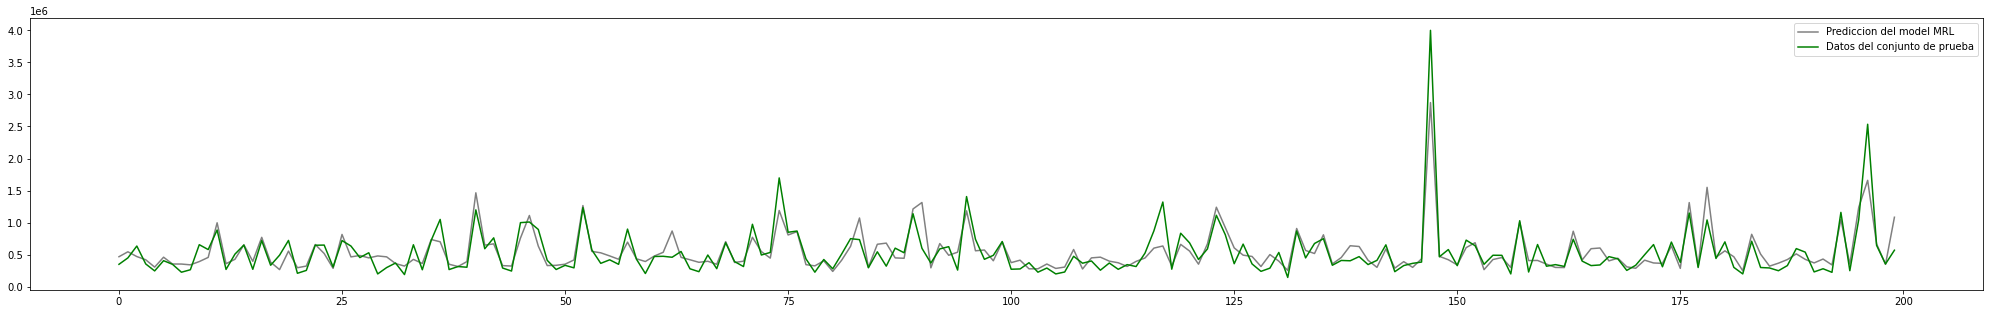

In [181]:
from matplotlib import markers
plt.figure(figsize=(35,5))
plt.plot(w_pred_Mlasso[0:200],'gray',label='predicted') 
plt.plot(w_test[0:200],'green',label='Tested') 
plt.legend(['Prediccion del model MRL','Datos del conjunto de prueba'])

**Resultado - sus errores y r cuadrada:**

In [208]:
MAE_MLasso=metrics.mean_absolute_error(w_test, w_pred_Mlasso)
RMSE_MLasso=np.sqrt(metrics.mean_squared_error(w_test, w_pred_Mlasso))
R2_MLasso=r2_score(w_test, w_pred_Mlasso)
MAE_MRL=139000
R2_MRL=0.67
print('Regresión Lasso:')
print('Error medio Absoluto (MAE):', MAE_MLasso)
print('Root Mean Squared Error:', RMSE_MLasso)
print('r2_score',R2_MLasso)



Regresión Lasso:
Error medio Absoluto (MAE): 126214.39199696553
Root Mean Squared Error: 191026.4595608079
r2_score 0.7398600335992735


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


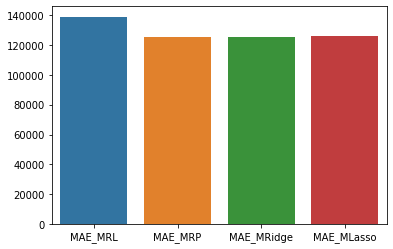

In [203]:
#2.6. GRÁFICAS: MAE (de los cuatro métodos)
MAE_values=[MAE_MRL,MAE_MRP,MAE_MRidge,MAE_MLasso]
MAE_labels=['MAE_MRL','MAE_MRP','MAE_MRidge','MAE_MLasso']
sns.barplot(MAE_labels, MAE_values)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


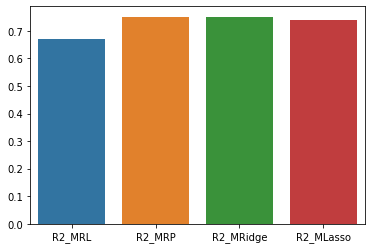

In [209]:
#2.6. GRÁFICAS: R2 (de los cuatro métodos)
R2_values=[R2_MRL,R2_MRP,R2_MRidge,R2_MLasso]
R2_labels=['R2_MRL','R2_MRP','R2_MRidge','R2_MLasso']
sns.barplot(R2_labels, R2_values)

**2.7 RESULTADOS Y ANÁLISIS**

1. ¿Que método conviene más a la empresa? y ¿por que?  

 RTA:En este caso utilizaria el método que presenta el mayor R2, que es la regresión REGRESIÓN MÚLTIPLE POLINOMIAL con un R2 de 0.7510. Este R2 es un buen indicador del exito de predicción del modelo, así que se elige el que más se acerca a 1. 
2. ¿Que porcentajes de entrenamiento y evaluación usaste?

 RTA: Bueno, también utilice 70% para entrenamiento y 30% para testing.  
3. ¿Que error tienes?, ¿es bueno?, ¿cómo lo sabes? 

 RTA: Para el modelo seleccionado REGRESIÓN MÚLTIPLE POLINOMIAL  con polinomio de grado 2 con un error del 24% (aprox), se determino por el R2. 

#**Ejercicio 3: Notebook 2. K means**
¿dónde le conviene poner sus almacenes para sustir las tiendas de target?

In [227]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [264]:
#Se instalan Librerias
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import qeds
qeds.themes.mpl_style();

In [229]:
#3.0. Se importa la base de datos.
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

In [265]:
#3.1. Se da una revisada a los datos para ver su naturaleza:
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [294]:
len(df)

1839

In [231]:
#3.2 Se observa que tiene 2 columans importantes que son las coordenadas.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


In [232]:
#3.3 Ya que el problema es sobre ubicación, se va a tomar las coordenadas (latitud y longitud) para resolver la pregunta de estudio.
#Se crea un df con las coordenadas
latlong=df[["latitude","longitude"]]

In [235]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [236]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


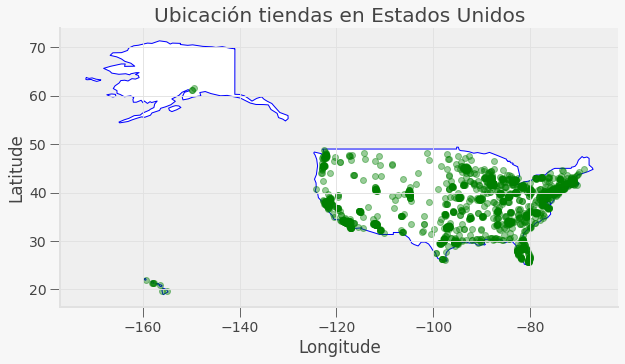

In [273]:
#3.4 Se va urilizar una representación Gráfica para entender la ubicación de las tiendas. Vamos a incluir un mapa del país para ubicarlas mejor.
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'United States of America'").plot(ax = gax, edgecolor='blue', color='white')

gdf.plot(ax=gax, color='green', alpha = 0.4)

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('Ubicación tiendas en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [274]:

clusters=range(1,20)
inercias=[]

In [295]:
#3.5 Se va a determinar el número de almacenes
from sklearn.cluster import KMeans
for cluster in clusters:
	model = KMeans(n_clusters = cluster) 
	model = model.fit(latlong)
	
	inercias.append(model.inertia_)

In [276]:
inercias

[529969.0787409769,
 173103.15765111498,
 106621.7299709462,
 84133.01887993298,
 62181.94600136383,
 47079.55313409124,
 38703.18634251651,
 32069.383216228718,
 26149.7836087509,
 22861.39596393337,
 20128.05878313037,
 17245.854871582676,
 15704.549989350133,
 13222.561743717546,
 12090.491069148851,
 10637.571711190325,
 9509.699674567715,
 8362.127671040109,
 7786.121069217668]

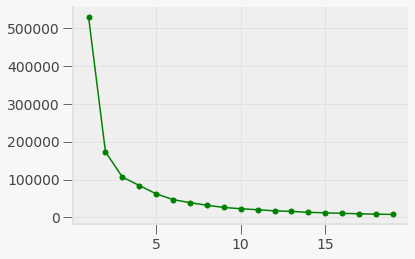

In [278]:
plt.plot(clusters, inercias, 'go-', markersize=5)

In [297]:
#3.6 Acorde a la gráfica de codo, voy a tomar 4 como el numero de almacenes optimo para este ejercicio.
model = KMeans(n_clusters = 5)
model.fit(latlong)


KMeans(n_clusters=5)

In [298]:
#3.7 Ubicacion de los almacenes 

from sklearn.cluster import KMeans
centros =model.cluster_centers_
centros


array([[ 4.17620114e+01, -8.83957941e+01,  4.00000000e+00],
       [ 3.75797742e+01, -1.19176343e+02,  7.10542736e-15],
       [ 3.43934593e+01, -9.82178462e+01,  1.00000000e+00],
       [ 4.03379069e+01, -7.56259688e+01,  2.00000000e+00],
       [ 3.10918569e+01, -8.28582021e+01,  3.00370370e+00]])

In [299]:
clusters

range(1, 20)

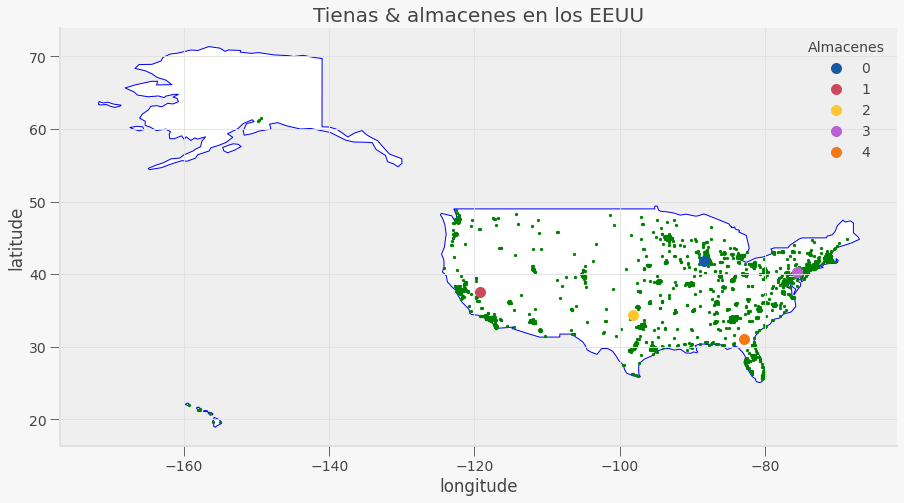

In [300]:
#3.8. Se va a graficar las tienas & almacenes en los EEUU. 
fig, gax = plt.subplots(figsize=(15,10))


world.query("name == 'United States of America'").plot(ax = gax, edgecolor='blue', color='white')

gdf.plot(ax=gax, color='green',markersize=5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Tienas & almacenes en los EEUU')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

for i in range(len(centros)):
	
  plt.scatter(centros[i][1],  centros[i][0],  label = i, s = 100)
plt.legend(title="Almacenes",loc = 'upper right',frameon=False)
plt.show()

In [291]:
latlong['kmeans']=model.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


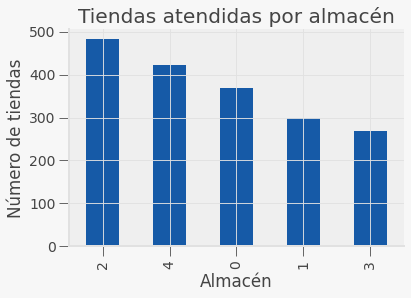

In [301]:
#3.9. Se representa el numero de tiendas por almcen
plt.title('Tiendas atendidas por almacén')
plt.ylabel('Número de tiendas')
plt.xlabel('Almacén')
latlong.kmeans.value_counts().plot(kind='bar')

**3.10 ANÁLISIS:**

1. Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es? 
   
   RTA: En el numeral 3.1. Se da una revisada a los datos para ver su naturaleza, se observa las latitudes y longitudes de los almacenes. Tambien se observa que están por todo el pais en multiples ciudades.

2. ¿a cuantas tiendas va surtir?
 
 RTA: Se determina que tiene 1389 tiendas diferentes para surtir.

3. ¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.  
RTA: El númeral 3.5 utilizamos el algoritmo K-Means para que con la ayuda de la gráfica de codo pdieramos determian el punto de inflexión. El objetivo de este algoritmo es el de encontrar “K” grupos (clusters) entre los datos crudos. 

4. ¿qué librerías nos pueden ayudar a graficar este tipo de datos?  
 RTA: Se utilizaron varias, todas incluidas al inico del ejercicio como: pandas,numpy, tqdm, numpy, matplotlib.pyplot, geopandas, shapely.geometry.

5. ¿Consideras importante que se grafique en un mapa?, ¿por qué? 
 
 RTA: Definitivamente. Si bien el análicis númerico es escencial, la representación gráfica complementa el análisis y una forma facil poder observar si tiene sentido o no lo que se está ejecutando. Adicional, en caso de querer vender la idea a superiores, las gráficas ayudan a comunicar las ideas de forma mucho más sencilla para gente no relacionada con el proceso. 

**3.11 CONCLUSIONES**
1. La base de datos provee información clave para resolver el problema
2. Se establece que el número optimo de almacenes es 5 y su ubicacion se detalla en el numeral 3.8 
3. Cada almacen surt entre 280 y 490 tiendas, descrito en el numeral 3.9 